<a href="https://colab.research.google.com/github/Nagaraj-gt/sl1-quarterly-results-stock-predictor/blob/main/Group9_SL_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building Regression Model for predicting next quarter stock price deviations



## Preparing Code

In [49]:
# Importing necessary libraries

import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


##STEP 1: Collect/Extract Data

In [3]:

# The data is prepared alreadt in excel.
fmcg_companies_df = pd.read_csv("20companies_Dataset_v7.csv")



## STEP 2: Pre-Process the Data
The missing values are taken care of prior. The data prepared is handmade referencing data from moneycontrol.com

### Labelling Data with stock deviation in next quarter

In [5]:
# Create an empty list
stock_list =[]
  
# Iterate over each row
for index, rows in fmcg_companies_df.iterrows():
    # Create list for the current row

    stock_deviation = (rows.get('QtrClosePrice') - rows.get('QtrOpenPrice'))/rows.get('QtrOpenPrice')
    stock_list.append(stock_deviation) 

stock_list.append(0)
## Assigning stock deviation for next quarter to current quater financial results
fmcg_companies_df['Next Stock Deviation'] = stock_list[1:len(stock_list)]



## STEP 3: Dividing Data into Training and Validation Datasets

### X values are ,

1. Net Sales/Income from operations
2. Total Income From Operations
3. Consumption of Raw Materials
4. Employees Cost
5. Depreciation
6. Other Expenses
7. P/L Before Tax
8. Tax
9. Net Profit/(Loss) For the Period
10. Equity Share Capital
11. Basic EPS
12. GDP Growth Rate
13. Gold Price (USD)

### Y to be predicted is **Next Stock Deviation**

In [27]:
X_features = ['Net Sales/Income from operations',
                                       'Total Income From Operations',
                                       'Consumption of Raw Materials',
                                       'Employees Cost',
                                       'Depreciation',
                                       'Other Expenses',
                                       'P/L Before Tax',
                                       'Tax',
                                       'Net Profit/(Loss) For the Period',
                                       'Equity Share Capital',
                                       'Basic EPS',
                                       'GDP Growth Rate',
                                       'Gold Price (USD)']
X = sm.add_constant(fmcg_companies_df[X_features] )

Y = fmcg_companies_df['Next Stock Deviation']

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [54]:
train_X, test_X, train_y, test_y = train_test_split( X, 
 Y, 
 train_size = 0.8, 
 random_state = 100 )

## STEP 5: Build the Model

In [29]:
next_stock_deviation_lm = sm.OLS( train_y, train_X ).fit()

### Intepretation of estimated parameters

In [30]:
print( next_stock_deviation_lm.params )

const                               0.265812
Net Sales/Income from operations   -0.000224
Total Income From Operations        0.000229
Consumption of Raw Materials        0.000010
Employees Cost                     -0.000028
Depreciation                       -0.000668
Other Expenses                      0.000001
P/L Before Tax                      0.000094
Tax                                -0.000037
Net Profit/(Loss) For the Period   -0.000183
Equity Share Capital                0.000232
Basic EPS                           0.000535
GDP Growth Rate                    -0.018707
Gold Price (USD)                   -0.000591
dtype: float64


The external factor of GDP growth rate has significant impact relative to other parameters. Its around 1.8%.

With respect to internal factors, Basic EPS ( operational eeficiency) has larger impact. That is around 0.05%

## STEP 6: Perform Model Diagnostics

1. Co-efficient of determination (R-squared).
2. Hypothesis test for the regression coefficient.
3. Analysis of variance for overall model validity (important for multiple linear regression).
4. Residual analysis to validate the regression model assumptions.
5. Outlier analysis, since the presence of outliers can significantly impact the regression parameters.

### Regression model summary

In [31]:
next_stock_deviation_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS                     Adj. R-squared:        -0.004   
Dependent Variable:     Next Stock Deviation    AIC:                   -234.2728
Date:                   2022-09-03 08:28        BIC:                   -178.9638
No. Observations:       384                     Log-Likelihood:        131.14   
Df Model:               13                      F-statistic:           0.8805   
Df Residuals:           370                     Prob (F-statistic):    0.574    
R-squared:              0.030                   Scale:                 0.030692 
--------------------------------------------------------------------------------
                                  Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
const                             0.2658   0.1937  1.3720 0.1709 -0.1152  0.6468
Net Sales/Income from operations -0.0002   0.0003 -0.6483 0.5172 -0.0009  0.0005
Total Income From Operations      0.0002   0.0003  0.6750 0.5001 -0.0004  0.0009
Consumption of Raw Materials      0.0000   0.0001  0.1405 0.8883 -0.0001  0.0001
Employees Cost                   -0.0000   0.0003 -0.0891 0.9290 -0.0006  0.0006
Depreciation                     -0.0007   0.0006 -1.1977 0.2318 -0.0018  0.0004
Other Expenses                    0.0000   0.0001  0.0085 0.9932 -0.0003  0.0003
P/L Before Tax                    0.0001   0.0002  0.4612 0.6449 -0.0003  0.0005
Tax                              -0.0000   0.0001 -0.4392 0.6608 -0.0002  0.0001
Net Profit/(Loss) For the Period -0.0002   0.0002 -0.7724 0.4404 -0.0006  0.0003
Equity Share Capital              0.0002   0.0002  1.0782 0.2817 -0.0002  0.0007
Basic EPS                         0.0005   0.0010  0.5241 0.6005 -0.0015  0.0025
GDP Growth Rate                  -0.0187   0.0093 -2.0132 0.0448 -0.0370 -0.0004
Gold Price (USD)                 -0.0006   0.0010 -0.5677 0.5706 -0.0026  0.0015
--------------------------------------------------------------------------------
Omnibus:                  198.261           Durbin-Watson:              1.696   
Prob(Omnibus):            0.000             Jarque-Bera (JB):           2209.905
Skew:                     1.910             Prob(JB):                   0.000   
Kurtosis:                 14.114            Condition No.:              99139   
================================================================================
* The condition number is large (1e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

The summary output could be inferred as below :

1. R-squared value is 0.03. This means the model is able to **explain 3% **of variations in stock price deviation.

2. The p-value for most are high apart from GDP Growth rate. For GDP Growth rate its 0.0448. This implies that GDP growth rate is only statistically significant at significance value of 5%.

3. At significance level of 5% , apart from GDP growth rate , all other factors have no significant impact on stock price deviation.

4. The probability F-statistics is 0.574. **This indicates thar overall model is statistically insignificant.**





### Residual Analysis

<Figure size 576x432 with 0 Axes>

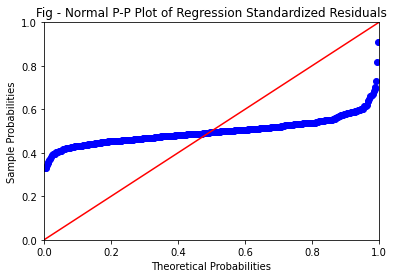

In [14]:
next_stock_deviation_resid = next_stock_deviation_lm.resid 
probplot = sm.ProbPlot(next_stock_deviation_resid) 
plt.figure( figsize = (8, 6)) 
probplot.ppplot( line='45' )
plt.title( "Fig - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()


## The model insignificance and above residual plot is not very intitutive. This might be the result of high collinearity.

### Removal of Multi-collinearity

Multi-collinearity might inflate tandard error of estimates. It also results in large p-values making statistically significant variable insignificant. 

With multi-collinearity, the model would be highly senstivite to adding or removing of factors. Worst case ,even the negative and positive sign of co-efficients might get flipped. 

In [32]:
## Calculation of Variation Inflation Factor (VIF) to understand high multi correlation. Feartures with VIF > 4 need ot be assessed.

def get_vif_factors( X ): 
  X_matrix = X.values
  vif = [ variance_inflation_factor( X_matrix, i ) for i in range ( X_matrix.shape[1] ) ]
  vif_factors = pd.DataFrame() 
  vif_factors['column'] = X.columns 
  vif_factors['VIF'] = vif
  return vif_factors


In [33]:
vif_factors = get_vif_factors( X[X.columns] ) 
vif_factors

,column,VIF
0,const,444.927065
1,Net Sales/Income from operations,10087.250384
2,Total Income From Operations,10097.045979
3,Consumption of Raw Materials,43.069374
4,Employees Cost,24.134087
5,Depreciation,15.131166
6,Other Expenses,41.500495
7,P/L Before Tax,329.613366
8,Tax,11.206608
9,Net Profit/(Loss) For the Period,175.700382


### Correlation of factors with large VIF > 4

Text(0.5, 1.0, 'Figure - Heatmap depicting correlation between features')

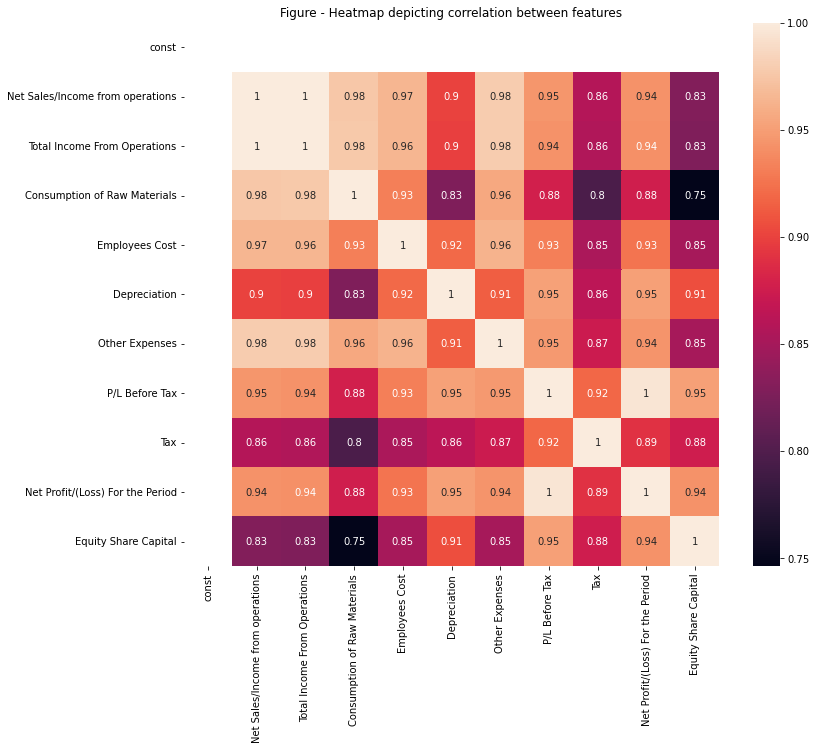

In [36]:
columns_with_large_vif = vif_factors[vif_factors.VIF > 4].column

## Plotting correlation matrix with VIF > 4

plt.figure( figsize = (12,10) )
sn.heatmap( X[columns_with_large_vif].corr(), annot = True );
plt.title("Figure - Heatmap depicting correlation between features")

Based on above heatmap, following could be inferred. Lets consider 0.95  above as highly correlated.

1. Net Sales/Income from Operations,Consumption of Raw Materials, Employee Cost, Other Expenses, Total Income from Operations are highly correlated.

2. Depreciation , P/L Before Tax,Net Profit/(Loss) For the Period and Equity Share Captial are highly correlated

### Based one above observations lets consider one of factors for model run. Selected factors are ,

1. Consumption of Raw Materials
2. Depreciation

**And remove other factors.**

In [39]:
columns_to_remove = ['Net Sales/Income from operations','Employees Cost','Other Expenses','Total Income From Operations',' P/L Before Tax','Net Profit/(Loss) For the Period','Equity Share Capital']

X_new_features = list( set(X_features) - set(columns_to_remove))

get_vif_factors( X[X_new_features] )


,column,VIF
0,GDP Growth Rate,25.090493
1,P/L Before Tax,27.577299
2,Consumption of Raw Materials,6.888658
3,Gold Price (USD),26.192505
4,Basic EPS,1.645716
5,Depreciation,14.802683
6,Tax,7.504594


The observations made out of above is as follows,

1. The earlier factors withvery high VIF is significantly reduced such as Consumption of Raw Materials, P/L Before Tax.

2. However factors with low VIF got increased many folds such as GDP Growth Rate, Gold Price (USD)

In [40]:
### Building new model

train_X_new = train_X[X_new_features]
model_2 = sm.OLS(train_y, train_X_new).fit()
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                  OLS                  Adj. R-squared (uncentered): 0.084    
Dependent Variable:     Next Stock Deviation AIC:                         -242.9594
Date:                   2022-09-03 09:06     BIC:                         -215.3049
No. Observations:       384                  Log-Likelihood:              128.48   
Df Model:               7                    F-statistic:                 6.003    
Df Residuals:           377                  Prob (F-statistic):          1.20e-06 
R-squared (uncentered): 0.100                Scale:                       0.030542 
------------------------------------------------------------------------------------
                                  Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------------------------
GDP Growth Rate                  -0.0096    0.0068  -1.4082  0.1599  -0.0229  0.0038
P/L Before Tax                    0.0000    0.0000   0.9044  0.3663  -0.0000  0.0001
Consumption of Raw Materials      0.0000    0.0000   0.4226  0.6728  -0.0000  0.0001
Gold Price (USD)                  0.0008    0.0003   2.6552  0.0083   0.0002  0.0014
Basic EPS                         0.0002    0.0009   0.2201  0.8259  -0.0015  0.0019
Depreciation                     -0.0008    0.0005  -1.7321  0.0841  -0.0017  0.0001
Tax                              -0.0000    0.0001  -0.2552  0.7987  -0.0001  0.0001
-----------------------------------------------------------------------------------
Omnibus:                   202.704            Durbin-Watson:               1.701   
Prob(Omnibus):             0.000              Jarque-Bera (JB):            2244.441
Skew:                      1.971              Prob(JB):                    0.000   
Kurtosis:                  14.169             Condition No.:               1083    
===================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

The above model summary following could be inferred,

1. Now the model is able to explain better. With R-squared value as 0.1 model is able to explain 10% variability.

2. The Prob F statistics is closer to 0. Hence model is statistically significant now.

3. At 10% significance level, one internal factor Depreciation and one external factor Gold Price(USD) is statistically significant.


### Building the model with only statistically significant factors

In [41]:
significant_vars = ['Depreciation', 'Gold Price (USD)']
train_X = train_X[significant_vars]
model_3 = sm.OLS(train_y, train_X).fit() 
model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                  OLS                  Adj. R-squared (uncentered): 0.086    
Dependent Variable:     Next Stock Deviation AIC:                         -248.8225
Date:                   2022-09-03 09:15     BIC:                         -240.9213
No. Observations:       384                  Log-Likelihood:              126.41   
Df Model:               2                    F-statistic:                 19.02    
Df Residuals:           382                  Prob (F-statistic):          1.34e-08 
R-squared (uncentered): 0.091                Scale:                       0.030469 
---------------------------------------------------------------------------------------
                      Coef.      Std.Err.        t        P>|t|       [0.025     0.975]
---------------------------------------------------------------------------------------
Depreciation         -0.0002       0.0001     -1.5130     0.1311     -0.0005     0.0001
Gold Price (USD)      0.0004       0.0001      5.9324     0.0000      0.0003     0.0005
-----------------------------------------------------------------------------------
Omnibus:                   204.418            Durbin-Watson:               1.705   
Prob(Omnibus):             0.000              Jarque-Bera (JB):            2173.901
Skew:                      2.009              Prob(JB):                    0.000   
Kurtosis:                  13.942             Condition No.:               3       
===================================================================================

"""

<Figure size 576x432 with 0 Axes>

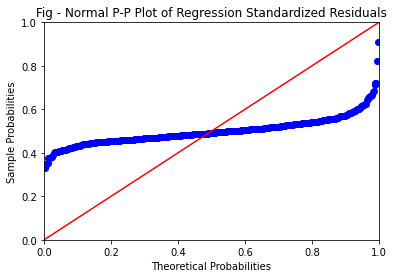

In [42]:
model_3_resid = model_3.resid 
probplot = sm.ProbPlot(model_3_resid) 
plt.figure( figsize = (8, 6)) 
probplot.ppplot( line='45' )
plt.title( "Fig - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

## CONCLUSION on MODEL SELECTION : 

No further improvement with statistically significant factors. The model f-statistics indicae that the model is significant yet its is able to explain only around 10%

Also very slight improvements in residual regression.

We might need to check now with **lasso optimization** to eliminate true factors.



## Elimination by LASSO

In [50]:

# Takes a model as a parameter
# Prints the RMSE on train and test set 
def get_train_test_rmse( model ):
  # Predicting on training dataset
  y_train_pred = model.predict( train_X )
  # Compare the actual y with predicted y in the training dataset
  rmse_train = round(np.sqrt(metrics.mean_squared_error( train_y,y_train_pred)),3)
  # Predicting on test dataset
  y_test_pred = model.predict( test_X )
  # Compare the actual y with predicted y in the test dataset
  rmse_test = round(np.sqrt(metrics.mean_squared_error(test_y,y_test_pred)),3)
  print("train: ", rmse_train," test:", rmse_test)

In [55]:
 # Applying alpha = 1 and running the algorithms for maximum of 500 iterations
lasso = Lasso(alpha = 0.01, max_iter = 500) 
lasso.fit( train_X, train_y )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.311e+00, tolerance: 1.171e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.01, max_iter=500)

In [56]:
get_train_test_rmse( lasso )

train:  0.172  test: 0.204


The differene between train and test is small. The model is is not overfitting. Surprisingly the test accuracy is higher. However both train and test accuracies are collectively underfitting.


In [59]:
## Storing the feature names and coefficient values in the DataFrame

lasso_coef_df = pd.DataFrame( { 'columns': train_X.columns ,'coef': lasso.coef_ } )

## Filtering out coefficients with zeros
lasso_coef_df[lasso_coef_df.coef == 0]

Index(['const', 'Net Sales/Income from operations',
       'Total Income From Operations', 'Consumption of Raw Materials',
       'Employees Cost', 'Depreciation', 'Other Expenses', 'P/L Before Tax',
       'Tax', 'Net Profit/(Loss) For the Period', 'Equity Share Capital',
       'Basic EPS', 'GDP Growth Rate', 'Gold Price (USD)'],
      dtype='object')


,columns,coef
0,const,0.0
13,Gold Price (USD),-0.0


### Generating Model basel on lasso elimination

In [67]:
X_lasso_features = list( set(X_features) - set(lasso_coef_df[lasso_coef_df.coef == 0]['columns'].to_list()))

lasso_model = sm.OLS(train_y, train_X[X_lasso_features]).fit()
lasso_model.summary2()

['Employees Cost', 'P/L Before Tax', 'Equity Share Capital', 'GDP Growth Rate', 'Net Profit/(Loss) For the Period', 'Consumption of Raw Materials', 'Total Income From Operations', 'Other Expenses', 'Basic EPS', 'Depreciation', 'Net Sales/Income from operations', 'Tax']


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                  OLS                  Adj. R-squared (uncentered): 0.064    
Dependent Variable:     Next Stock Deviation AIC:                         -229.8612
Date:                   2022-09-03 10:13     BIC:                         -182.4535
No. Observations:       384                  Log-Likelihood:              126.93   
Df Model:               12                   F-statistic:                 3.179    
Df Residuals:           372                  Prob (F-statistic):          0.000241 
R-squared (uncentered): 0.093                Scale:                       0.031203 
-----------------------------------------------------------------------------------
                                      Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-----------------------------------------------------------------------------------
Employees Cost                       -0.0001   0.0003 -0.3343 0.7383 -0.0007 0.0005
P/L Before Tax                        0.0000   0.0002  0.0457 0.9636 -0.0004 0.0004
Equity Share Capital                  0.0003   0.0002  1.4349 0.1522 -0.0001 0.0007
GDP Growth Rate                       0.0061   0.0024  2.5264 0.0119  0.0014 0.0109
Net Profit/(Loss) For the Period     -0.0001   0.0002 -0.4499 0.6530 -0.0006 0.0004
Consumption of Raw Materials          0.0000   0.0001  0.3890 0.6975 -0.0001 0.0002
Total Income From Operations          0.0004   0.0003  1.0413 0.2984 -0.0003 0.0010
Other Expenses                       -0.0000   0.0001 -0.1807 0.8567 -0.0003 0.0002
Basic EPS                             0.0010   0.0010  1.0258 0.3056 -0.0009 0.0030
Depreciation                         -0.0005   0.0006 -0.8457 0.3982 -0.0016 0.0006
Net Sales/Income from operations     -0.0003   0.0003 -1.0012 0.3174 -0.0010 0.0003
Tax                                  -0.0000   0.0001 -0.3023 0.7626 -0.0002 0.0001
-----------------------------------------------------------------------------------
Omnibus:                   192.847            Durbin-Watson:               1.734   
Prob(Omnibus):             0.000              Jarque-Bera (JB):            1946.883
Skew:                      1.878              Prob(JB):                    0.000   
Kurtosis:                  13.372             Condition No.:               1260    
===================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

### Model based on lasso significant fields is significant. However it is able to explain nearly 10%. The factor influencing most now is GDP Growth Rate and Equity Share Capital with 15% significance level.

## STEP 7: Validate the Model and Measure Model Accuracy

In [68]:
pred_y = next_stock_deviation_lm.predict( test_X )

np.abs(r2_score(test_y, pred_y))

0.006194107265665383

In [71]:
lasso_pred_y = lasso.predict( test_X )

np.abs(r2_score(test_y, lasso_pred_y))

0.008040187069476623

## STEP 8: Decide on Model Deployment